In [1]:
import numpy as np
import tensorflow as tf
import matplotlib as plt
from tensorflow.keras import datasets,layers, models
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from tensorflow.keras.datasets import mnist
from sklearn.datasets import load_iris
from keras.utils import to_categorical
from keras.metrics import categorical_crossentropy
from sklearn import metrics
import matplotlib.pyplot as plt

2024-07-24 17:17:11.332220: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-24 17:17:11.332370: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-24 17:17:11.482273: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [3]:
x_train, x_test = x_train / 255.0, x_test / 255.0
y_test.shape

(10000, 1)

**CNN model**

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32,32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation = 'softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/backend/tensorflow/nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


  69/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1454 - loss: 2.2477

I0000 00:00:1721841457.349122     106 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1721841457.368732     106 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.3591 - loss: 1.7391
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5779 - loss: 1.1886
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6417 - loss: 1.0159
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6852 - loss: 0.8996
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7070 - loss: 0.8319
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7342 - loss: 0.7623
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7480 - loss: 0.7189
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7640 - loss: 0.6657
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7869 - loss: 0.6108
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7945 - loss: 0.5878


**confusion matrix**

In [10]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
test_acc


313/313 - 0s - 2ms/step - accuracy: 0.7055 - loss: 0.8805


0.7055000066757202

In [11]:
mnist_predictions = model.predict(x_test)
mnist_predicted_labels = np.argmax(mnist_predictions, axis=1)
mnist_confusion = confusion_matrix(y_test, mnist_predicted_labels)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Text(70.72222222222221, 0.5, 'True classes')

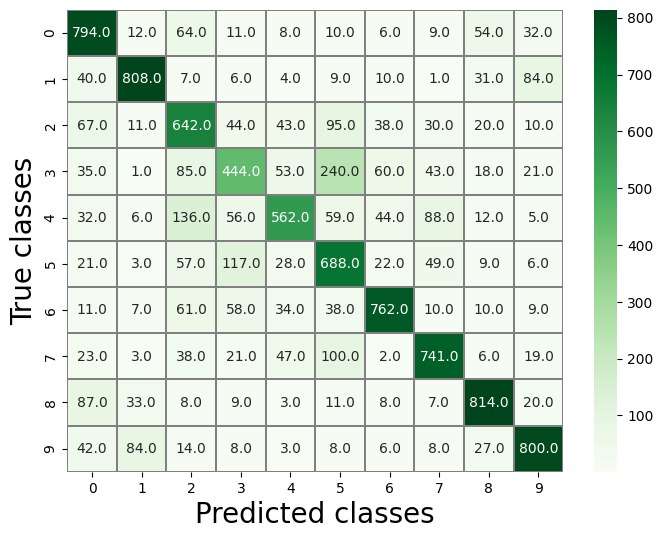

In [12]:
import seaborn as sns 

plt.figure(figsize = (8,6))
sns.heatmap(mnist_confusion, linewidths = 0.1, cmap = 'Greens', linecolor = 'gray', 
            fmt = '.1f', annot = True)
plt.xlabel('Predicted classes', fontsize = 20)
plt.ylabel('True classes', fontsize = 20)

**precision:**
True Positive / (True Positive + False Positive)

In [13]:
Precision = metrics.precision_score(y_test, mnist_predicted_labels, average='weighted')
print(Precision,"of data that is predicted as true was exactly true")

0.7093095640871306 of data that is predicted as true was exactly true


**Recall:** True Positive / (True Positive + False Negative)

In [14]:
recall = metrics.recall_score(y_test, mnist_predicted_labels, average="weighted")
print(recall, "of the actual true data was predicted as true")

0.7055 of the actual true data was predicted as true


**F1 score:** 2 * ((Precision * recall) / (Precision + recall))

In [15]:
F1_score = metrics.f1_score(y_test, mnist_predicted_labels, average="weighted")
F1_score

0.7042424583812777

**trying more complex model to improve accuracy:**

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, Activation

model2 = Sequential()

# First Convolutional Block
model2.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Conv2D(32, (3, 3), padding='same'))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

# Second Convolutional Block
model2.add(Conv2D(64, (3, 3), padding='same'))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Conv2D(64, (3, 3), padding='same'))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

# Third Convolutional Block
model2.add(Conv2D(128, (3, 3), padding='same'))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Conv2D(128, (3, 3), padding='same'))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

# Fully Connected Layers
model2.add(Flatten())
model2.add(Dense(512))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Dropout(0.5))
model2.add(Dense(512))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Dropout(0.5))
model2.add(Dense(10, activation='softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 8, 8, 128)      │             

 Total params: 1,609,770 (6.14 MB)

 Trainable params: 1,606,826 (6.13 MB)

 Non-trainable params: 2,944 (11.50 KB)

In [18]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model2.fit(x_train, y_train, epochs=10)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/backend/tensorflow/nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


  19/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.1103 - loss: 3.0333  

W0000 00:00:1721842464.396926     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 13ms/step - accuracy: 0.3486 - loss: 1.9246
Epoch 2/10


W0000 00:00:1721842484.221121     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6142 - loss: 1.0887
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6848 - loss: 0.9074
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7283 - loss: 0.7898
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7532 - loss: 0.7232
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7722 - loss: 0.6553
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7949 - loss: 0.5970
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8039 - loss: 0.5732
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8183 - loss: 0.5340
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8287 - loss: 0.5023


the accuracy increased when we use more complex cnn model

In [21]:
test_loss1, test_acc1 = model2.evaluate(x_test,  y_test, verbose=2)
test_acc1


W0000 00:00:1721843320.729738     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 - 2s - 8ms/step - accuracy: 0.8307 - loss: 0.4812


W0000 00:00:1721843322.184195     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


0.8306999802589417

**confusion matrix**

In [22]:
test_loss, test_acc = model2.evaluate(x_test,  y_test, verbose=2)
test_acc


313/313 - 1s - 3ms/step - accuracy: 0.8307 - loss: 0.4812


0.8306999802589417

In [23]:
mnist_predictions = model2.predict(x_test)
mnist_predicted_labels = np.argmax(mnist_predictions, axis=1)
mnist_confusion = confusion_matrix(y_test, mnist_predicted_labels)


 81/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

W0000 00:00:1721843994.565603     106 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


W0000 00:00:1721843995.844164     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Text(70.72222222222221, 0.5, 'True classes')

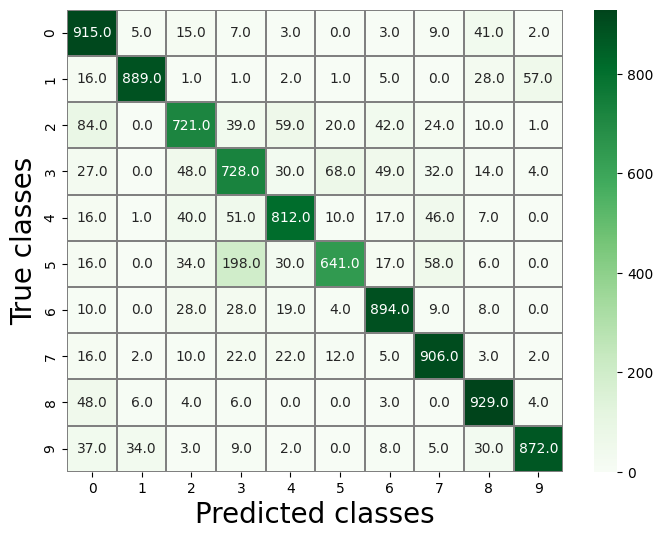

In [24]:
import seaborn as sns 

plt.figure(figsize = (8,6))
sns.heatmap(mnist_confusion, linewidths = 0.1, cmap = 'Greens', linecolor = 'gray', 
            fmt = '.1f', annot = True)
plt.xlabel('Predicted classes', fontsize = 20)
plt.ylabel('True classes', fontsize = 20)

**precision:**
True Positive / (True Positive + False Positive)

In [25]:
Precision = metrics.precision_score(y_test, mnist_predicted_labels, average='weighted')
print(Precision,"of data that is predicted as true was exactly true")

0.8342467235124501 of data that is predicted as true was exactly true


**Recall:** True Positive / (True Positive + False Negative)

In [26]:
recall = metrics.recall_score(y_test, mnist_predicted_labels, average="weighted")
print(recall, "of the actual true data was predicted as true")

0.8307 of the actual true data was predicted as true


**F1 score:** 2 * ((Precision * recall) / (Precision + recall))

In [27]:
F1_score = metrics.f1_score(y_test, mnist_predicted_labels, average="weighted")
F1_score

0.8296082703064345